<a href="https://colab.research.google.com/github/dhyannn/predictive-analytics/blob/main/PA_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Data Preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [2]:
# Handle missing values (if applicable)
# Check for missing values
missing_values = X.isnull().sum()
# If missing values are present, handle them using appropriate strategies

# Normalize or scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

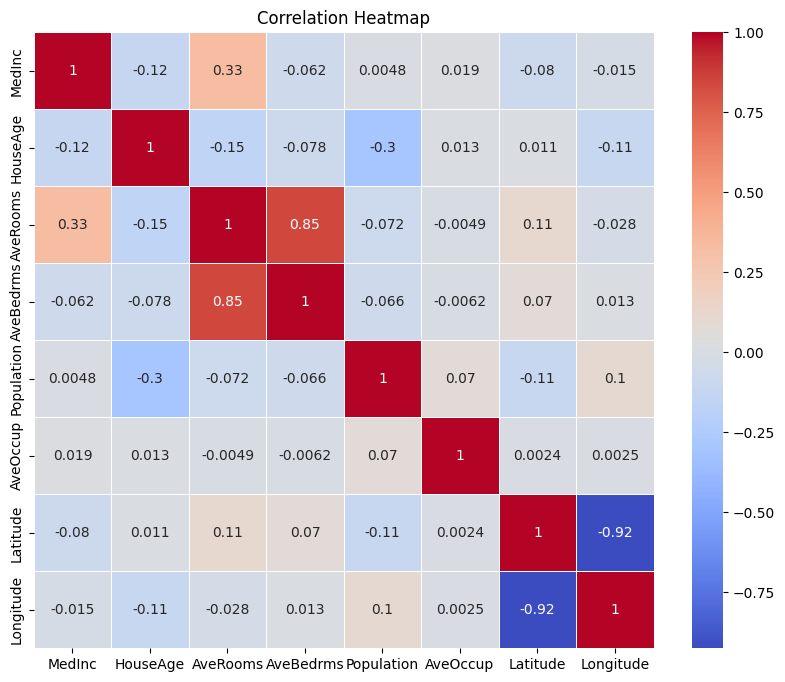

In [3]:

# Step 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# EDA to explore relationships between features and target variable
# Example: correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [4]:
# Step 3: Model Building
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and validation/test sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build regression models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_val)
    # Evaluate the model
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    print(f"Model: {model_name}")
    print(f"RMSE: {rmse}, R-squared: {r2}, MAE: {mae}")



Model: Multiple Linear Regression
RMSE: 0.7455813830127761, R-squared: 0.5757877060324511, MAE: 0.5332001304956565
Model: Ridge Regression
RMSE: 0.745554290938461, R-squared: 0.575818534544132, MAE: 0.5331933646313113
Model: Lasso Regression
RMSE: 1.1448563543099792, R-squared: -0.00021908714592466794, MAE: 0.9060685490007149


In [5]:
# Step 4: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [6]:
# Step 5: Model Evaluation
# Evaluate the best model
y_pred_best = best_model.predict(X_val)
rmse_best = mean_squared_error(y_val, y_pred_best, squared=False)
r2_best = r2_score(y_val, y_pred_best)
mae_best = mean_absolute_error(y_val, y_pred_best)
print("Best Model (Ridge Regression) Performance:")
print(f"RMSE: {rmse_best}, R-squared: {r2_best}, MAE: {mae_best}")

Best Model (Ridge Regression) Performance:
RMSE: 0.745578665891467, R-squared: 0.5757907979394903, MAE: 0.5331994387872134
